In [140]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score, classification_report
from tensorflow import keras
from keras.models import Sequential
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [141]:
ticker = 'High_Value_Dataset_July_2021_preprocessed'
input_dir = r'./data/'
file = os.path.join(input_dir, ticker + '.csv')

In [142]:
df = pd.read_csv(file, index_col=0)
df

,Gender,Race,Age,County,Current Facility,Offense Code,TDCJ Offense,Sentence (Years),Last Parole Decision,Parole Review Status,Parole Eligibility (Years),Sentence Left (Years)
2,1,6,85,55,92,11220000,1087,999.0,0,0,-18,999
3,1,2,84,173,71,9150000,7178,999.0,0,0,-15,999
5,1,1,83,204,9,11990003,1380,20.0,0,0,-8,2
6,1,6,84,99,86,9130000,3487,999.0,0,1,-40,999
8,1,2,82,218,26,36120005,4952,20.0,0,0,-16,2
...,...,...,...,...,...,...,...,...,...,...,...,...
118305,1,6,30,227,54,12990001,9666,10.0,0,0,0,9
118307,1,2,20,219,94,12990002,864,6.0,0,0,0,3
118310,1,1,29,55,82,12990001,9666,2.0,1,0,-1,1
118313,1,1,24,214,20,35990003,8604,7.0,0,1,-1,6


In [143]:
X = df.drop(['Last Parole Decision'], axis=1).values
Y = df['Last Parole Decision'].values

np.random.shuffle(X)
np.random.shuffle(Y)

assert X.shape[0] == Y.shape[0]

In [144]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [145]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

## Helper Functions

In [178]:
def report(y_test, y_pred):
    """
    This function prints out the classification report for the given data.
    """
    TN, FP, FN, TP = confusion_matrix(y_test, y_pred, labels=[1, 0]).ravel()    ## TPR and TNR
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or test positive rate
    TNR = TN/(TN+FP) # Specificity or test negative rate
    print(f'\nTrue Positive Rate: {TPR:.2f} \nTrue Negative Rate: {TNR:.2f}')

    cm = confusion_matrix(y_test, y_pred)
    cmd = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
    cmd.plot(include_values=True, cmap='viridis')

    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')
    print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')

def validation(model, X, Y, k):
    """
    This function does k-fold validation on the given data.

    Parameters:
    model: The model to be used for validation.
    X: The data to be used for validation.
    Y: The labels to be used for validation.
    k: The number of folds to be used for validation.

    Returns:
    The average accuracy of the model using K Fold Validation.
    """
    acc = cross_val_score(model, X, Y, cv=k, scoring='accuracy')

    return print(f'\n10 Fold Validation accuracy: {acc.mean():.2f}')

def plot_learning_curve(history):
    """
    Function to plot the learning curve

    Returns:
        None
    """
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(f'Train accuracy: {np.mean(history.history["accuracy"]):.2f}')
    print(f'\nTest accuracy: {np.mean(history.history["val_accuracy"]):.2f}')
    print(f'Test loss: {np.mean(history.history["val_loss"]):.2f}')

def plot_learning_curve(history):
    """
    Function to plot the learning curve

    Returns:
        None
    """
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(f'Train accuracy: {np.mean(history.history["accuracy"]):.2f}')
    print(f'\nTest accuracy: {np.mean(history.history["val_accuracy"]):.2f}')
    print(f'Test loss: {np.mean(history.history["val_loss"]):.2f}')

## Classifiers

### 1) K Nearest Neighbors

Find the Best value of K with elbow method

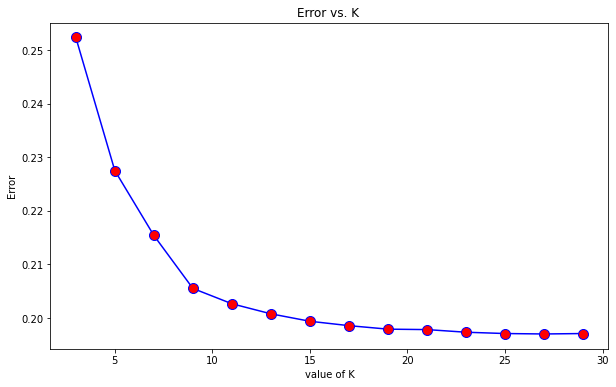

Minimum error 0.19702662963568043 at K =  12


In [147]:
scores_list = []

for i in range(3, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    scores_list.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(3, 30, 2), scores_list, color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error vs. K ')
plt.xlabel('value of K')
plt.ylabel('Error')
plt.show()
print(f'Minimum error {min(scores_list)} at K =  {scores_list.index(min(scores_list))}')

Main Model with k = 13

In [176]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)


True Positive Rate: 0.99 
True Negative Rate: 0.01
Accuracy: 0.80
Mean Squared Error: 0.20

F1 Score: 0.01
10 Fold Validation accuracy: 0.80


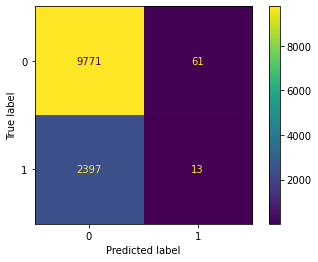

In [177]:
report(y_test, knn_pred)
validation(knn, X, Y, 10)

### 2) Naive Bayesian

In [179]:
gnb = GaussianNB().fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)


True Positive Rate: 0.99 
True Negative Rate: 0.01
Accuracy: 0.80
Mean Squared Error: 0.20
F1 Score: 0.01

10 Fold Validation accuracy: 0.80


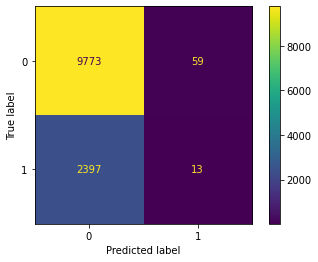

In [180]:
report(y_test, gnb_pred)
validation(gnb, X, Y, 10)

## 3) Decision Tree

In [181]:
dt = DecisionTreeClassifier().fit(x_train, y_train)
dt_pred = dt.predict(x_test)


True Positive Rate: 0.78 
True Negative Rate: 0.22
Accuracy: 0.67
Mean Squared Error: 0.33
F1 Score: 0.21

10 Fold Validation accuracy: 0.67


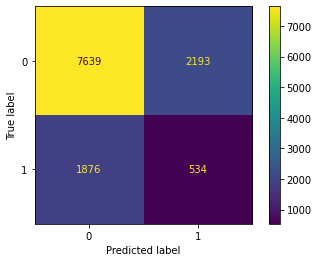

In [182]:
report(y_test, dt_pred)
validation(dt, X, Y, 10)

### 4) Logistic Regression

In [183]:
lr = LogisticRegression().fit(x_train, y_train)
lr_pred = lr.predict(x_test)


True Positive Rate: 1.00 
True Negative Rate: 0.00
Accuracy: 0.80
Mean Squared Error: 0.20
F1 Score: 0.00

10 Fold Validation accuracy: 0.80


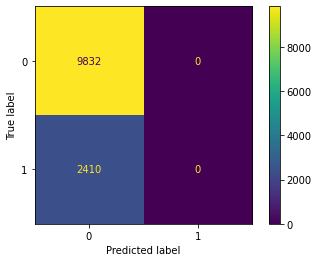

In [184]:
report(y_test, lr_pred)
validation(lr, X, Y, 10)

### 5) Neural Net

In [185]:
model = Sequential()
model.add(keras.layers.Input(shape=(x_train.shape[1],)))
model.add(keras.layers.Dense(units=100, activation='elu'))
model.add(keras.layers.Dense(units=100, activation='elu'))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [186]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1531/1531 [==============================] - 8s 5ms/step - loss: 0.5073 - accuracy: 0.8014 - val_loss: 0.4988 - val_accuracy: 0.8031
Epoch 2/5
1531/1531 [==============================] - 8s 5ms/step - loss: 0.5012 - accuracy: 0.8025 - val_loss: 0.5007 - val_accuracy: 0.8031
Epoch 3/5
1531/1531 [==============================] - 8s 5ms/step - loss: 0.4998 - accuracy: 0.8025 - val_loss: 0.4979 - val_accuracy: 0.8031
Epoch 4/5
1531/1531 [==============================] - 8s 5ms/step - loss: 0.4992 - accuracy: 0.8025 - val_loss: 0.5003 - val_accuracy: 0.8031
Epoch 5/5
1531/1531 [==============================] - 8s 5ms/step - loss: 0.4991 - accuracy: 0.8025 - val_loss: 0.4970 - val_accuracy: 0.8031


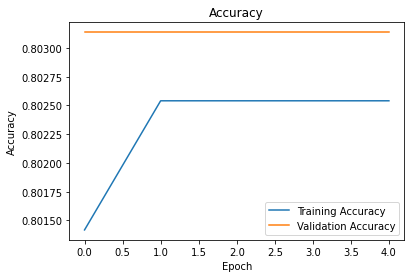

Train accuracy: 0.80

Test accuracy: 0.80
Test loss: 0.50


In [187]:
plot_learning_curve(history)